In [ ]:
import os
import numpy as np
import cv2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Conv2D, UpSampling2D, Activation, Input
from tensorflow.keras.losses import binary_crossentropy
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split

In [ ]:
def load_data(image_folder, mask_folder):
    images = []
    masks = []
    for filename in os.listdir(image_folder):
        img = cv2.imread(os.path.join(image_folder, filename))
        img = cv2.resize(img, (227, 227))  # Resize for SqueezeNet input size
        images.append(img)
        mask = cv2.imread(os.path.join(mask_folder, filename), cv2.IMREAD_GRAYSCALE)
        mask = cv2.resize(mask, (192, 192))  # Resize to match model output size
        mask = np.expand_dims((mask > 127).astype(np.uint8), axis=-1)  # Convert to binary mask and add channel dimension
        masks.append(mask)
    return np.array(images), np.array(masks)

In [ ]:
train_images, train_masks = load_data("/content/drive/MyDrive/Water Bodies Dataset/training_images", "/content/drive/MyDrive/Water Bodies Dataset/training_masks")


In [ ]:
test_images, test_masks = load_data("/content/drive/MyDrive/Water Bodies Dataset/test_images", "/content/drive/MyDrive/Water Bodies Dataset/test_masks")

In [ ]:
train_images = train_images / 255.0
test_images = test_images / 255.0

In [ ]:
train_images, val_images, train_masks, val_masks = train_test_split(train_images, train_masks, test_size=0.2, random_state=42)


In [ ]:
def create_model(input_shape):
    input_layer = Input(shape=input_shape)

    # Convolutional layers
    x = Conv2D(96, (7, 7), strides=(2, 2), activation='relu')(input_layer)
    x = Conv2D(128, (5, 5), strides=(2, 2), activation='relu')(x)
    x = Conv2D(128, (3, 3), activation='relu')(x)
    x = Conv2D(128, (3, 3), activation='relu')(x)
    x = Conv2D(128, (3, 3), activation='relu')(x)
    x = UpSampling2D((4, 4))(x)  # Upsample to match the desired output size
    x = Conv2D(1, (1, 1), activation='sigmoid')(x)

    return Model(inputs=input_layer, outputs=x)

In [ ]:
model = create_model(input_shape=(227, 227, 3))

In [ ]:
model.compile(optimizer=Adam(), loss=binary_crossentropy, metrics=['accuracy'])

In [ ]:
model.fit(train_images, train_masks, epochs=10, batch_size=8, validation_data=(val_images, val_masks))

Epoch 1/10
199/199 [==============================] - 589s 3s/step - loss: 0.5881 - accuracy: 0.7051 - val_loss: 0.5390 - val_accuracy: 0.7157
Epoch 2/10
199/199 [==============================] - 581s 3s/step - loss: 0.5470 - accuracy: 0.7360 - val_loss: 0.5145 - val_accuracy: 0.7507
Epoch 3/10
199/199 [==============================] - 585s 3s/step - loss: 0.5303 - accuracy: 0.7447 - val_loss: 0.5149 - val_accuracy: 0.7395
Epoch 4/10
199/199 [==============================] - 580s 3s/step - loss: 0.5168 - accuracy: 0.7565 - val_loss: 0.5259 - val_accuracy: 0.7603
Epoch 5/10
199/199 [==============================] - 586s 3s/step - loss: 0.5057 - accuracy: 0.7617 - val_loss: 0.4824 - val_accuracy: 0.7830
Epoch 6/10
199/199 [==============================] - 581s 3s/step - loss: 0.4841 - accuracy: 0.7847 - val_loss: 0.4916 - val_accuracy: 0.7754
Epoch 7/10
199/199 [==============================] - 574s 3s/step - loss: 0.4709 - accuracy: 0.7883 - val_loss: 0.4263 - val_accuracy: 0.8091

In [ ]:
loss, accuracy = model.evaluate(test_images, test_masks)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

27/27 [==============================] - 93s 3s/step - loss: 0.4480 - accuracy: 0.7947
Test Loss: 0.4480055570602417
Test Accuracy: 0.7947397232055664


In [ ]:
predicted_masks = model.predict(test_images)

27/27 [==============================] - 88s 3s/step


Image 1 - Water Probability: 0.17242582142353058


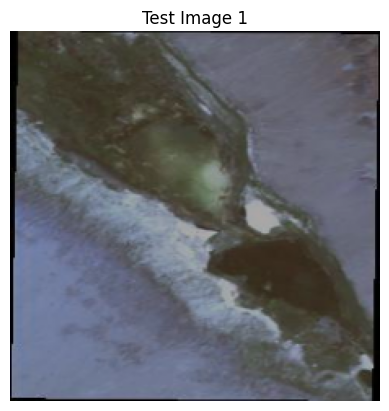

Image 2 - Water Probability: 0.42787912487983704


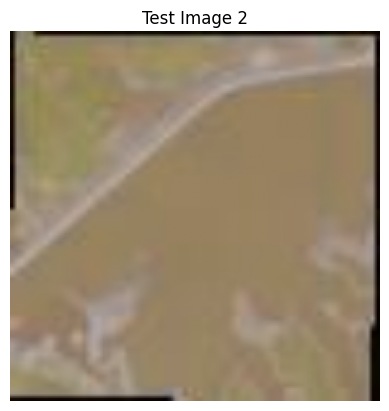

Image 3 - Water Probability: 0.35507047176361084


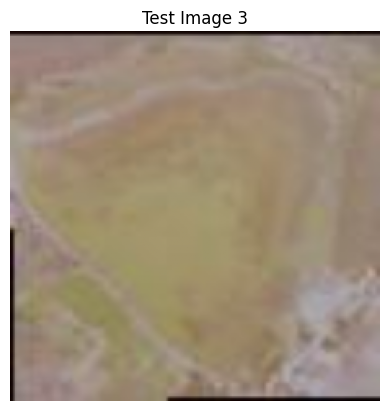

Image 4 - Water Probability: 0.4460800588130951


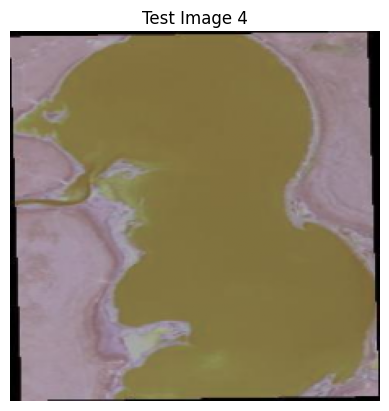

Image 5 - Water Probability: 0.4553011655807495


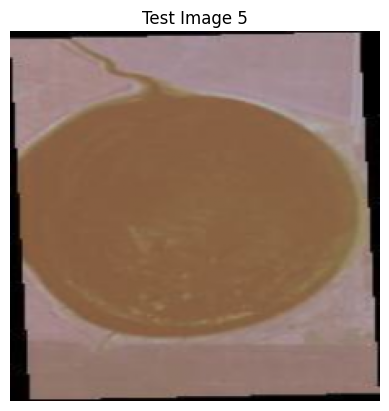

Image 6 - Water Probability: 0.09329532086849213


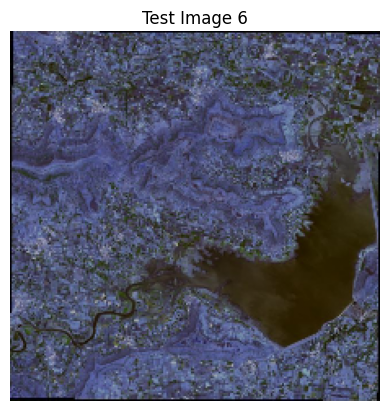

Image 7 - Water Probability: 0.17241737246513367


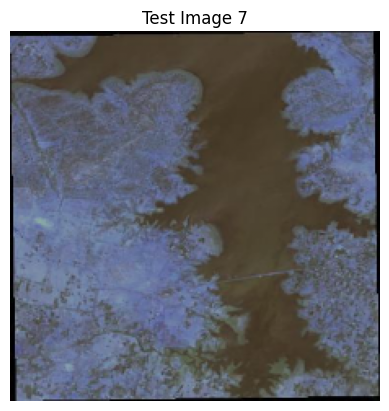

Image 8 - Water Probability: 0.21069015562534332


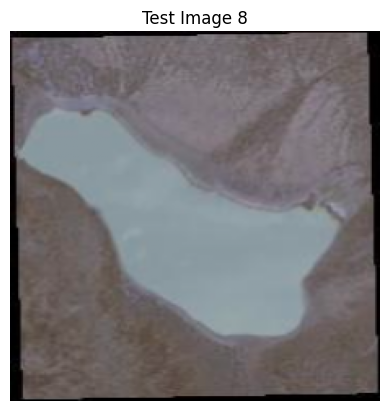

Image 9 - Water Probability: 0.8753189444541931


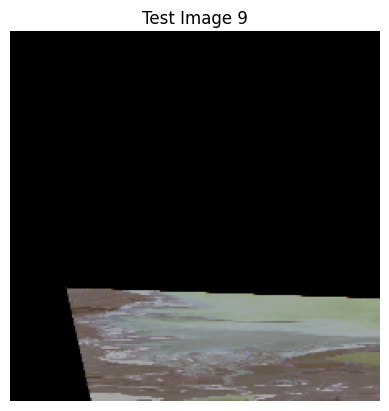

Image 10 - Water Probability: 0.07947483658790588


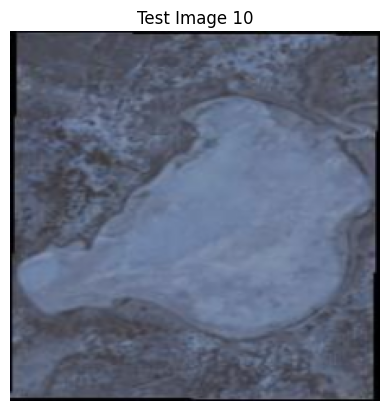

In [ ]:
import matplotlib.pyplot as plt
for i in range(10):
    water_probability = np.mean(predicted_masks[i])
    print(f"Image {i+1} - Water Probability: {water_probability}")

    # Display the image
    plt.imshow(test_images[i])
    plt.title(f"Test Image {i+1}")
    plt.axis("off")
    plt.show()